# PANDA HANDLER

In [24]:
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_excel('BMF2018.xltx')

# PEGANDO BLUE CHIPS

In [3]:
bmf2018 = df
bmf2018.tail()

,TIPO DE REGISTRO,DATA DO PREGAO,CODIGO BDI,CODIGO DE NEGOGIACAO DO PAPEL,TIPO DE MERCADO,NOME RESUMIDO DA EMPRESA EMISSORA,ESPECIFICACAO DO PAPEL,MOEDA DE REFERENCIA,PRECO DE ABERTURA,PRECO MAXIMO,...,PRECO MELHOR OFERTA COMPRA,PRECO MELHOR OFERTA DE VENDA,NUMERO DE NEGOCIOS EFETUADOS COM O PAPEL,QUANTIDADE TOTAL DE TITULOS NEGOCIADOS,VOLUME TOTAL DE TITULOS NEGOCIADOS NESTE PAPEL,PRECO DE EXERCICIO OPCAO,Unnamed: 19,Unnamed: 20,CODIGO DO PAPEL NO SISTEMA,NUMERO DE DISTRIBUICAO DO PAPEL
580151,1,20181228,12.0,XPLG11,10,FII XP LOG,CI,R$,10000.0,10030.0,...,10000.0,10030.0,804.0,17310.0,172940811.0,0.0,9.999123e+14,0.0,BRXPLGCTF002,106.0
580152,1,20181228,12.0,XPML11,10,FII XP MALLS,CI ER,R$,10790.0,10800.0,...,10750.0,10780.0,1321.0,20067.0,215038945.0,0.0,9.999123e+14,0.0,BRXPMLCTF000,113.0
580153,1,20181228,14.0,XPOM11,10,FIP XP OMEGA,CI,R$,10301.0,10301.0,...,10300.0,10599.0,5.0,494.0,5088600.0,0.0,9.999123e+14,0.0,BRXPOMCTF004,115.0
580154,1,20181228,12.0,XTED11,10,FII TRXE COR,CI,R$,1751.0,1790.0,...,1751.0,1790.0,23.0,222.0,390676.0,0.0,9.999123e+14,0.0,BRXTEDCTF006,143.0
580155,99,COTAHIST,0.2,018BOVESPA 2,18,122800000580,157,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# PRIMEITO AGRUPA DE ACORDO COM ATIVO
df_gb = bmf2018.groupby('CODIGO DE NEGOGIACAO DO PAPEL')

# DEPOIS SOMA O VOLUME E ORDENAR DECRESCENTE
bc = df_gb.sum()['VOLUME TOTAL DE TITULOS NEGOCIADOS NESTE PAPEL'].sort_values(ascending=False)

# CRIA INDICE PARA O NOME DO ATIVO DEIXAR DE SER O INDICE
blue_chips = bc.reset_index()['CODIGO DE NEGOGIACAO DO PAPEL']

# SELECIONA SOMENTE OS 100 ATIVOS QUE TEM NOME PADRAO (EXCLUI MERCADO A TERMO, FIIs, ETC)  
blue_chips = blue_chips[blue_chips.apply(lambda name: len(name) <= 5 )].iloc[:100]
blue_chips.nunique()
# SALVA NUM CSV
blue_chips.to_csv('BLUECHIPS',index=False)

/home/rodrigo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [6]:
blue_chips.nunique()


100

# GERANDO TABELA DE CADA BLUE CHIP

In [50]:
for bc_code in blue_chips:
    # PEGA SOMENTE OS QUE TEM O CODIGO QUE EU QUERO (PARA CADA 'BC_CODE' - BLUE CHIP)
    stock = bmf2018[bmf2018['CODIGO DE NEGOGIACAO DO PAPEL'] == bc_code].reset_index()
    # SELECIONA AS COLUNAS IMPORTANTES
    colunas_importantes = ['DATA DO PREGAO', 'CODIGO DE NEGOGIACAO DO PAPEL', 'NOME RESUMIDO DA EMPRESA EMISSORA', 'PRECO DE ABERTURA', 'PRECO MAXIMO', 'PRECO MINIMO', 'PRECO FECHAMENTO', 'VOLUME TOTAL DE TITULOS NEGOCIADOS NESTE PAPEL']
    stock = stock[colunas_importantes]
    # AJUSTE DE VALOR
    stock['PRECO MAXIMO'] = stock['PRECO MAXIMO']/100
    stock['PRECO MINIMO'] = stock['PRECO MINIMO']/100
    stock['PRECO DE ABERTURA'] = stock['PRECO DE ABERTURA']/100
    stock['PRECO FECHAMENTO'] = stock['PRECO FECHAMENTO']/100
    stock['VOLUME TOTAL DE TITULOS NEGOCIADOS NESTE PAPEL'] = stock['VOLUME TOTAL DE TITULOS NEGOCIADOS NESTE PAPEL']/100
    # CRIA COLUNAS DE ESTATISTICA
    stock['MA_20'] = stock['PRECO FECHAMENTO'].rolling(window=20).mean()
    stock['MA_40'] = stock['PRECO FECHAMENTO'].rolling(window=40).mean()
    stock['STD_20'] = stock['PRECO FECHAMENTO'].rolling(window=20).std()
    stock['STD_40'] = stock['PRECO FECHAMENTO'].rolling(window=40).std()
    stock['BANDA_1_40 SUPERIOR'] = stock['MA_40'] + 2* stock['STD_40']
    stock['BANDA_1_40 INFERIOR'] = stock['MA_40'] - 2* stock['STD_40']
    stock['BANDA_2_40 SUPERIOR'] = stock['MA_40'] + 3* stock['STD_40']
    stock['BANDA_2_40 INFERIOR'] = stock['MA_40'] - 3* stock['STD_40']
    stock = stock.fillna(value=0)
    # SALVA NA PASTA
    save_dir = 'HISTORICO_2018/' + stock['CODIGO DE NEGOGIACAO DO PAPEL'].iloc[0] + '_2018'
    stock.to_csv(save_dir,index=False)

In [51]:
stock.head()

,DATA DO PREGAO,CODIGO DE NEGOGIACAO DO PAPEL,NOME RESUMIDO DA EMPRESA EMISSORA,PRECO DE ABERTURA,PRECO MAXIMO,PRECO MINIMO,PRECO FECHAMENTO,VOLUME TOTAL DE TITULOS NEGOCIADOS NESTE PAPEL,MA_20,MA_40,STD_20,STD_40,BANDA_1_40 SUPERIOR,BANDA_1_40 INFERIOR,BANDA_2_40 SUPERIOR,BANDA_2_40 INFERIOR
0,20180102,VLID3,VALID,18.40,19.20,18.40,19.20,17838230.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20180103,VLID3,VALID,19.02,19.62,19.02,19.49,18824927.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20180104,VLID3,VALID,19.31,19.58,19.22,19.49,21695398.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20180105,VLID3,VALID,19.31,19.81,19.31,19.45,16926172.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20180108,VLID3,VALID,19.45,19.75,19.10,19.40,24114116.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(40, 250)

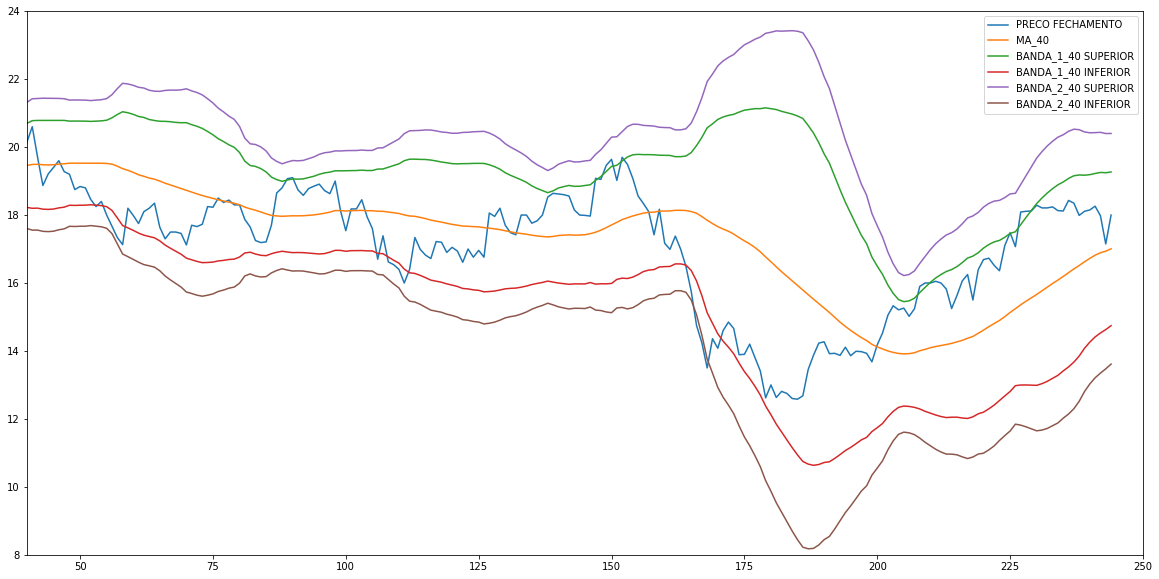

In [67]:
stock_plt = stock[['PRECO FECHAMENTO','MA_40','BANDA_1_40 SUPERIOR','BANDA_1_40 INFERIOR','BANDA_2_40 SUPERIOR','BANDA_2_40 INFERIOR']].plot
stock_plt = stock_plt.line(figsize=(20,10))
stock_plt.set_ylim([8, 24])
stock_plt.set_xlim([40, 250])
stock_plt.set_xlim([40, 250])


In [66]:
%matplotlib inline